Observations
- According to the data, the seasons can affect the inventories and the prices.
- The inventories tend to decrease in winter and increase in warmer temperatures.
- Similarly, the prices tend to increase and decrease according to the seasons.
- Finally, we can conclude that the seasons affect both prices and inventories, but this      
  depends on the location of the state.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# import the csv files
houses_inventory_df = pd.read_csv("../Project-1-Group-8/Resources/Metro_single_family_inventory.csv")

In [3]:
# clean the datafile by removing the columns that will not be used
houses_inv_clean_df = houses_inventory_df.drop(columns = ['RegionID','SizeRank','RegionType','RegionName'])
houses_inv_clean_df.head()

,StateName,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,...,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30
0,NaN,1473863.0,1363258.0,1214863.0,1213824.0,1231285.0,1354516.0,1444805.0,1513335.0,1566749.0,...,1215637.0,1218110.0,1218038.0,1268669.0,1176125.0,1262927.0,1241911.0,1204523.0,1143870.0,1081314.0
1,NY,61337.0,55858.0,48983.0,47909.0,50994.0,56041.0,62267.0,66931.0,68737.0,...,51156.0,50151.0,52234.0,55285.0,45766.0,49691.0,55193.0,56555.0,54287.0,53324.0
2,CA,23988.0,21095.0,17177.0,18596.0,20553.0,22878.0,24346.0,26308.0,27341.0,...,18619.0,19327.0,20572.0,20720.0,18760.0,21623.0,22811.0,23312.0,22776.0,22177.0
3,IL,37986.0,33625.0,28506.0,27985.0,29558.0,34484.0,36556.0,38640.0,40345.0,...,30628.0,30609.0,32670.0,34044.0,30218.0,33071.0,34072.0,33225.0,31403.0,29268.0
4,TX,28105.0,25409.0,22094.0,21670.0,22246.0,25388.0,28688.0,30374.0,32433.0,...,29338.0,29149.0,30126.0,31208.0,29424.0,32729.0,32253.0,31448.0,28968.0,26158.0


In [4]:
# Transpose the DataFrame 
houses_inv_clean_df = houses_inv_clean_df.T
houses_inv_clean_df.reset_index().head()


,index,0,1,2,3,4,5,6,7,8,...,111,112,113,114,115,116,117,118,119,120
0,StateName,NaN,NY,CA,IL,TX,PA,TX,DC,FL,...,CO,TX,NC,CA,FL,MN,NC,TX,TN,OH
1,2017-10-31,1.47386e+06,61337,23988,37986,28105,29998,32466,23550,26327,...,783,130,822,763,571,96,253,398,203,58
2,2017-11-30,1.36326e+06,55858,21095,33625,25409,28980,30331,24385,26035,...,703,112,790,657,578,87,243,391,208,48
3,2017-12-31,1.21486e+06,48983,17177,28506,22094,24460,27755,20624,25334,...,627,108,729,536,529,69,233,367,204,48
4,2018-01-31,1.21382e+06,47909,18596,27985,21670,23866,28280,19245,27478,...,646,140,777,499,580,73,229,344,205,50


In [5]:
# drop the first row
houses_inv_clean_df = houses_inv_clean_df.drop(columns = 0)

In [6]:
houses_inv_clean_df.head()

,1,2,3,4,5,6,7,8,9,10,...,111,112,113,114,115,116,117,118,119,120
StateName,NY,CA,IL,TX,PA,TX,DC,FL,GA,MA,...,CO,TX,NC,CA,FL,MN,NC,TX,TN,OH
2017-10-31,61337,23988,37986,28105,29998,32466,23550,26327,32996,10582,...,783,130,822,763,571,96,253,398,203,58
2017-11-30,55858,21095,33625,25409,28980,30331,24385,26035,29985,9035,...,703,112,790,657,578,87,243,391,208,48
2017-12-31,48983,17177,28506,22094,24460,27755,20624,25334,26284,6902,...,627,108,729,536,529,69,233,367,204,48
2018-01-31,47909,18596,27985,21670,23866,28280,19245,27478,26814,6302,...,646,140,777,499,580,73,229,344,205,50


In [7]:
# adding a new column to a DataFrame using the index which is the date to populate the column
houses_inv_clean_df['Date']=houses_inv_clean_df.index

In [8]:
houses_inv_clean_df.head()

,1,2,3,4,5,6,7,8,9,10,...,112,113,114,115,116,117,118,119,120,Date
StateName,NY,CA,IL,TX,PA,TX,DC,FL,GA,MA,...,TX,NC,CA,FL,MN,NC,TX,TN,OH,StateName
2017-10-31,61337,23988,37986,28105,29998,32466,23550,26327,32996,10582,...,130,822,763,571,96,253,398,203,58,2017-10-31
2017-11-30,55858,21095,33625,25409,28980,30331,24385,26035,29985,9035,...,112,790,657,578,87,243,391,208,48,2017-11-30
2017-12-31,48983,17177,28506,22094,24460,27755,20624,25334,26284,6902,...,108,729,536,529,69,233,367,204,48,2017-12-31
2018-01-31,47909,18596,27985,21670,23866,28280,19245,27478,26814,6302,...,140,777,499,580,73,229,344,205,50,2018-01-31


### Calculte data range for each season

In [9]:
# Create the Dataframes for the fall season for the 3 years in the datafile (2017-2020)
houses_inv_fall_2018_df   = houses_inv_clean_df.loc[(houses_inv_clean_df['Date'] >= '2017-09-22') & (houses_inv_clean_df['Date'] <= '2017-12-20')]
houses_inv_fall_2019_df   = houses_inv_clean_df.loc[(houses_inv_clean_df['Date'] >= '2018-09-22') & (houses_inv_clean_df['Date'] <= '2018-12-20')]
houses_inv_fall_2020_df   = houses_inv_clean_df.loc[(houses_inv_clean_df['Date'] >= '2019-09-22') & (houses_inv_clean_df['Date'] <= '2019-12-20')]

# Create the Dataframes for the winter season for the 3 years in the datafile (2017-2020)
houses_inv_winter_2018_df = houses_inv_clean_df.loc[(houses_inv_clean_df['Date'] >= '2017-12-21') & (houses_inv_clean_df['Date'] <= '2018-03-18')]
houses_inv_winter_2019_df =  houses_inv_clean_df.loc[(houses_inv_clean_df['Date'] >= '2018-12-21') & (houses_inv_clean_df['Date'] <= '2019-03-18')]                                          
houses_inv_winter_2020_df =  houses_inv_clean_df.loc[(houses_inv_clean_df['Date'] >= '2019-12-21') & (houses_inv_clean_df['Date'] <= '2020-03-18')]                                                   
 
# Create the Dataframes for the spring season for the 3 years in the datafile (2017-2020)    
houses_inv_spring_2018_df = houses_inv_clean_df.loc[(houses_inv_clean_df['Date'] >= '2018-03-19') & (houses_inv_clean_df['Date'] <= '2018-06-19')]
houses_inv_spring_2019_df = houses_inv_clean_df.loc[(houses_inv_clean_df['Date'] >= '2019-03-19') & (houses_inv_clean_df['Date'] <= '2019-06-19')]
houses_inv_spring_2020_df = houses_inv_clean_df.loc[(houses_inv_clean_df['Date'] >= '2020-03-19') & (houses_inv_clean_df['Date'] <= '2020-06-19')]

# Create the Dataframes for the summer season for the 3 years in the datafile (2017-2020)
houses_inv_summer_2018_df = houses_inv_clean_df.loc[(houses_inv_clean_df['Date'] >= '2018-06-20') & (houses_inv_clean_df['Date'] <= '2018-09-21')]
houses_inv_summer_2019_df = houses_inv_clean_df.loc[(houses_inv_clean_df['Date'] >= '2019-06-20') & (houses_inv_clean_df['Date'] <= '2019-09-21')]
houses_inv_summer_2020_df = houses_inv_clean_df.loc[(houses_inv_clean_df['Date'] >= '2020-06-20') & (houses_inv_clean_df['Date'] <= '2020-09-21')]
houses_inv_fall_2018_df

,1,2,3,4,5,6,7,8,9,10,...,112,113,114,115,116,117,118,119,120,Date
2017-10-31,61337,23988,37986,28105,29998,32466,23550,26327,32996,10582,...,130,822,763,571,96,253,398,203,58,2017-10-31
2017-11-30,55858,21095,33625,25409,28980,30331,24385,26035,29985,9035,...,112,790,657,578,87,243,391,208,48,2017-11-30


In [10]:
# once the DataFrames are created the Date column added before is deleted from all the DataFrames.
houses_fall_clean_2018_df = houses_inv_fall_2018_df.drop(columns = ['Date'])
houses_fall_clean_2019_df = houses_inv_fall_2019_df.drop(columns = ['Date'])
houses_fall_clean_2020_df = houses_inv_fall_2020_df.drop(columns = ['Date'])

houses_winter_clean_2018_df = houses_inv_winter_2018_df.drop(columns = ['Date'])
houses_winter_clean_2019_df = houses_inv_winter_2019_df.drop(columns = ['Date'])
houses_winter_clean_2020_df = houses_inv_winter_2020_df.drop(columns = ['Date'])

houses_spring_clean_2018_df = houses_inv_spring_2018_df.drop(columns = ['Date'])
houses_spring_clean_2019_df = houses_inv_spring_2019_df.drop(columns = ['Date'])
houses_spring_clean_2020_df = houses_inv_spring_2020_df.drop(columns = ['Date'])

houses_summer_clean_2018_df = houses_inv_summer_2018_df.drop(columns = ['Date'])
houses_summer_clean_2019_df = houses_inv_summer_2019_df.drop(columns = ['Date'])
houses_summer_clean_2020_df = houses_inv_summer_2020_df.drop(columns = ['Date'])


In [11]:
# fall data average price

# 2018
houses_fall_clean_2018_df = houses_fall_clean_2018_df.T.sum()
houses_fall_2018_total = round(houses_fall_clean_2018_df.mean())

# 2019
houses_fall_clean_2019_df = houses_fall_clean_2019_df.T.sum()
houses_fall_2019_total = round(houses_fall_clean_2019_df.mean())

# 2020
houses_fall_clean_2020_df = houses_fall_clean_2020_df.T.sum()
houses_fall_2020_total = round(houses_fall_clean_2020_df.mean())


In [12]:
# Winter data average price

# 2018
houses_winter_clean_2018_df = houses_winter_clean_2018_df.T.sum()
houses_winter_2018_total = round(houses_winter_clean_2018_df.mean())

# 2019
houses_winter_clean_2019_df = houses_winter_clean_2019_df.T.sum()
houses_winter_2019_total = round(houses_winter_clean_2019_df.mean())

# 2020
houses_winter_clean_2020_df = houses_winter_clean_2020_df.T.sum()
houses_winter_2020_total = round(houses_winter_clean_2020_df.mean())


In [13]:
# spring data average price

# 2018
houses_spring_clean_2018_df = houses_spring_clean_2018_df.astype(int).T.sum()
houses_spring_2018_total = round(houses_spring_clean_2018_df.astype(int).mean())
    
# 2019
houses_spring_clean_2019_df = round(houses_spring_clean_2019_df.T.sum())
houses_spring_2019_total = round(houses_spring_clean_2019_df.mean())

# 2020
houses_summer_clean_2019_df = houses_summer_clean_2019_df.T.sum()
houses_summer_2019_total = round(houses_summer_clean_2019_df.mean())


In [14]:
# summer data average price

# 2018
houses_summer_clean_2018_df = houses_summer_clean_2018_df.T.sum()
houses_summer_2018_total = round(houses_summer_clean_2018_df.mean())

# 2018
houses_spring_clean_2020_df = houses_spring_clean_2020_df.T.sum()
houses_spring_2020_total = round(houses_spring_clean_2020_df.mean())

# 2020
houses_summer_clean_2020_df = houses_summer_clean_2020_df.T.sum()
houses_summer_2020_total = round(houses_summer_clean_2020_df.mean())


In [15]:
# list to store the mean of the fall inventory of each season for the 3 years
list_season_fall = []
list_season_fall.append(houses_fall_2018_total)
list_season_fall.append(houses_fall_2019_total)
list_season_fall.append(houses_fall_2020_total)

# list to store the mean of the winter inventory of each season for the 3 years
list_season_winter = []
list_season_winter.append(houses_winter_2018_total)
list_season_winter.append(houses_winter_2019_total)
list_season_winter.append(houses_winter_2020_total)

# list to store the mean of the spring inventory of each season for the 3 years
list_season_spring = []
list_season_spring.append(houses_spring_2018_total)
list_season_spring.append(houses_spring_2019_total)
list_season_spring.append(houses_spring_2020_total)

# list to store the mean of the summer inventory of each season for the 3 years
list_season_summer = []
list_season_summer.append(houses_summer_2018_total)
list_season_summer.append(houses_summer_2019_total)
list_season_summer.append(houses_summer_2020_total)

In [16]:
# created dataframe with an index to plot in a Bar Chart
seasonally_avg_inv = pd.DataFrame({
                            "Fall"  :list_season_fall,
                            "Winter":list_season_winter,
                            "Spring":list_season_spring,
                            "Summer":list_season_summer
    },index=['2017-2018','2018-2019','2019-2020'])
seasonally_avg_inv

,Fall,Winter,Spring,Summer
2017-2018,832262,710339,862504,937967
2018-2019,898091,771685,900236,966017
2019-2020,891997,734734,756947,739487


Text(0.5, 0, 'Years')

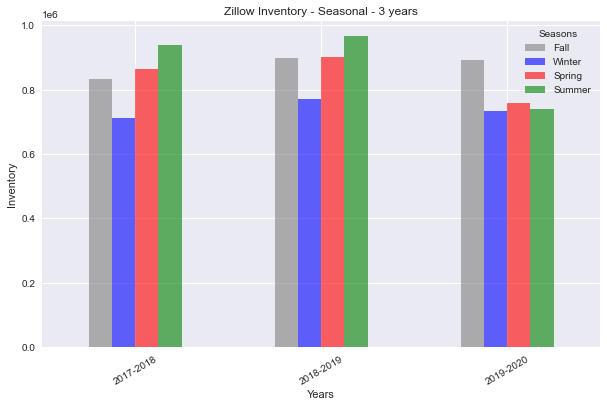

In [17]:
# Bar Chart
plt.style.use('seaborn') 
seasonally_avg_inv.plot(kind="bar",color = ['gray','blue','red','green'],alpha=0.6, align="center", legend = True,figsize=(10,6)).legend(
    loc='upper right', ncol=1 , title="Seasons"
)
plt.xticks(rotation=30, horizontalalignment="center")

# formatted title and labels
plt.title ('Zillow Inventory - Seasonal - 3 years')
plt.ylabel("Inventory")
plt.xlabel("Years")


### Sale Prices over the seasons

In [18]:
#import the csv file 
house_sale_price_df= pd.read_csv("../Project-1-Group-8/Resources/sale_price_single_family.csv")

# clean data removing the first row
house_sale_price_df = house_sale_price_df.iloc[1:,:]
house_sale_price_df.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31
1,394913,1,"New York, NY",Msa,NY,NaN,NaN,NaN,NaN,NaN,...,430000.0,430000.0,431000.0,430000.0,430000.0,448000.0,450000.0,457000.0,465000.0,480000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,535000.0,527000.0,530000.0,510000.0,510000.0,...,660000.0,671000.0,673000.0,677000.0,695000.0,678000.0,665000.0,699000.0,730000.0,749400.0
3,394463,3,"Chicago, IL",Msa,IL,250000.0,247500.0,252000.0,255000.0,260000.0,...,243000.0,240000.0,234000.0,240000.0,256500.0,267000.0,259400.0,260500.0,270000.0,280000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,145455.0,154000.0,152950.0,156000.0,161975.0,...,271945.0,278000.0,268000.0,275000.0,280000.0,287000.0,281000.0,294900.0,301100.0,300000.0
5,394974,5,"Philadelphia, PA",Msa,PA,218000.0,224000.0,221000.0,230000.0,239000.0,...,250000.0,250000.0,240000.0,240000.0,250000.0,270000.0,263000.0,270000.0,279000.0,280000.0


In [19]:
# get the data from the mid season for each season
houses_price_seasonally = pd.DataFrame(house_sale_price_df,columns = ['StateName',
                                                                      '2017-11-30','2018-02-28','2018-05-31','2018-08-31',
                                                                      '2019-11-30','2019-02-28','2019-05-31','2019-08-31',
                                                                      '2020-02-29','2020-05-31','2020-08-31'])

houses_price_seasonally.head()

,StateName,2017-11-30,2018-02-28,2018-05-31,2018-08-31,2019-11-30,2019-02-28,2019-05-31,2019-08-31,2020-02-29,2020-05-31,2020-08-31
1,NY,400000.0,397500.0,420000.0,442000.0,430000.0,419900.0,430000.0,445278.0,430000.0,450000.0,480000.0
2,CA,625000.0,635000.0,665000.0,660000.0,660000.0,639000.0,660000.0,660000.0,677000.0,665000.0,749400.0
3,IL,227000.0,225000.0,251000.0,245000.0,243000.0,232500.0,256175.0,252000.0,240000.0,259400.0,280000.0
4,TX,254900.0,257013.0,276000.0,270000.0,271945.0,260000.0,282500.0,277000.0,275000.0,281000.0,300000.0
5,PA,230000.0,220000.0,242000.0,255000.0,250000.0,225000.0,253250.0,265000.0,240000.0,263000.0,280000.0


In [20]:
# calculate the mean price for all the US
houses_price_seasonally_mean = round(houses_price_seasonally.mean(),2)
houses_price_seasonally_mean

2017-11-30    257457.93
2018-02-28    257891.92
2018-05-31    273788.48
2018-08-31    274328.25
2019-11-30    280045.65
2019-02-28    266894.74
2019-05-31    284391.80
2019-08-31    284372.32
2020-02-29    280291.44
2020-05-31    294220.48
2020-08-31    314230.43
dtype: float64

In [21]:
# calculate the median price for all the US
houses_price_seasonally_median = houses_price_seasonally.median()
houses_price_seasonally_median

2017-11-30    223750.0
2018-02-28    220000.0
2018-05-31    231500.0
2018-08-31    233950.0
2019-11-30    242500.0
2019-02-28    226375.0
2019-05-31    248750.0
2019-08-31    243400.0
2020-02-29    240000.0
2020-05-31    252449.5
2020-08-31    267000.0
dtype: float64

In [22]:
# created a DataFrame wiht the % increase column
house_percentage_increase = pd.DataFrame({'Date':houses_price_seasonally_mean.index,
                                          'Median Price':houses_price_seasonally_median.values,
                                          'Average Price':houses_price_seasonally_mean.values,
                                          '% increase':''})

In [23]:
# Calculated the percentage changed from one season to another
for index,row in house_percentage_increase.iterrows():
    
    if index >= 1:
        house_percentage_increase.loc[index,'% increase'] = ((house_percentage_increase.loc[index,'Average Price']-
                                                             house_percentage_increase.loc[index -1,'Average Price'])/
                                                             house_percentage_increase.loc[index-1,'Average Price']*100)
    

In [24]:
house_percentage_increase

,Date,Median Price,Average Price,% increase
0,2017-11-30,223750.0,257457.93,
1,2018-02-28,220000.0,257891.92,0.168567
2,2018-05-31,231500.0,273788.48,6.16404
3,2018-08-31,233950.0,274328.25,0.197149
4,2019-11-30,242500.0,280045.65,2.08415
5,2019-02-28,226375.0,266894.74,-4.69599
6,2019-05-31,248750.0,284391.80,6.55579
7,2019-08-31,243400.0,284372.32,-0.00684971
8,2020-02-29,240000.0,280291.44,-1.43505
9,2020-05-31,252449.5,294220.48,4.96948


In [25]:
# Greatest % Increase in May - 2018-05-31, 2019-05-31, 2020-05-31 which is in Summer
# Greatest % Decrease in February 2019-02-28, 2020-02-29 which is in winter

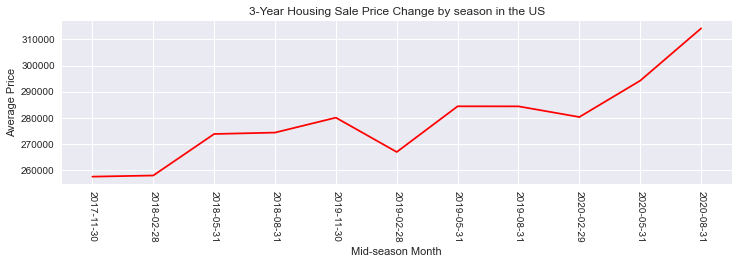

In [26]:
# created a line graph

# style
plt.style.use('seaborn')

# figure size
plt.figure(figsize=(12,3))

# plot the graph
plt.plot(houses_price_seasonally_mean,color = 'red')
plt.xticks(rotation=-90)

# title and labels
plt.title("3-Year Housing Sale Price Change by season in the US")
plt.xlabel("Mid-season Month")
plt.ylabel("Average Price")
plt.show()


#### House price per State

In [27]:
# create a DataFrame for the Northern and Southern States
house_price_per_state_NV = houses_price_seasonally.loc[houses_price_seasonally.StateName == 'NV']
house_price_per_state_MN = houses_price_seasonally.loc[houses_price_seasonally.StateName == 'MN']
house_price_per_state_FL = houses_price_seasonally.loc[houses_price_seasonally.StateName == 'FL']
house_price_per_state_WI = houses_price_seasonally.loc[houses_price_seasonally.StateName == 'WI']


In [28]:
house_price_per_state_ID

NameError: name 'house_price_per_state_ID' is not defined

In [29]:
# get the average price for each state
house_price_per_state_MN = house_price_per_state_MN.mean()
house_price_per_state_NV = house_price_per_state_NV.mean()
house_price_per_state_FL = house_price_per_state_FL.mean()
house_price_per_state_WI = house_price_per_state_WI.mean()

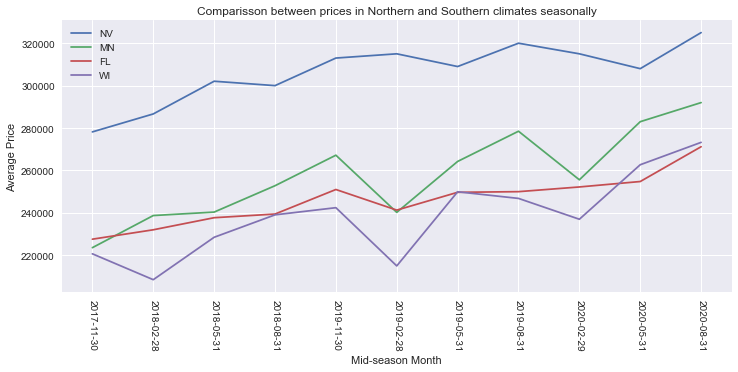

In [30]:
# created a line graph

index_list = house_price_per_state_MN.index.tolist()

plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(12, 5))

# plot each line
ax.plot(index_list, house_price_per_state_NV.values, label="NV")
ax.plot(index_list, house_price_per_state_MN.values, label="MN")
ax.plot(index_list, house_price_per_state_FL.values, label="FL")
ax.plot(index_list, house_price_per_state_WI.values, label="WI")

ax.legend( loc='upper left')
plt.title("Comparisson between prices in Northern and Southern climates seasonally")
plt.xlabel("Mid-season Month")
plt.ylabel("Average Price")
plt.xticks(rotation=-90, horizontalalignment="center")
plt.show()